<a href="https://colab.research.google.com/github/annice6/Program-for-Data-Analytics-Project-1/blob/main/Project_2B)Basic_Data_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#basic data visualization using obesity dataset
#This tutorial was adapted from Zach Gold and Ben Hamner via Kaggle.
#The examples have been modified to match the teaching objectives of this lecture

#We will be using pandas for loading the csv file into a dataframe
import pandas as pd

#matplotlib is a python library for basic graph plotting
import matplotlib.pyplot as plt

#seaborn is another python graphing library that is built upon matplotlib and allows you to optimize matplotlib's output
import seaborn as sns

#switching from matplotlib's default graphing style to that of seaborn's. Seaborn displays graph lines, matplotlib doesn't
sns.set(color_codes = True)

#removing warnings from the output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#read data from a csv file into pandas dataframe

# https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset #
obesity = pd.read_csv('/content/Obesity Classification.csv')


In [ ]:
obesity

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [ ]:
# #view dataframe of just the first five rows
obesity.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
#how many records we have for each Label
obesity["Label"].value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

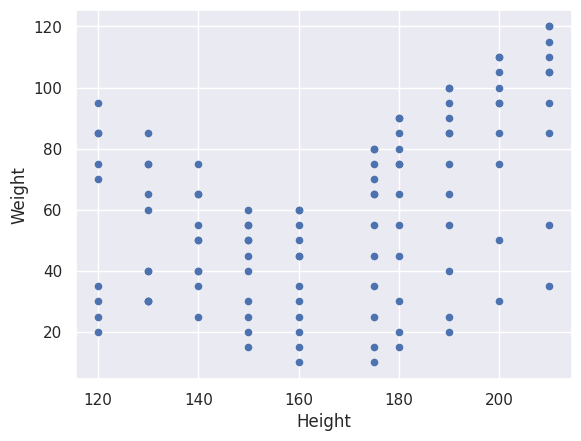

In [ ]:
#Making a scatterplot from using methods from within pandas!
#No need for matplotlib or seaborn!

obesity.plot(kind='scatter', x = 'Height', y = 'Weight')
plt.show()

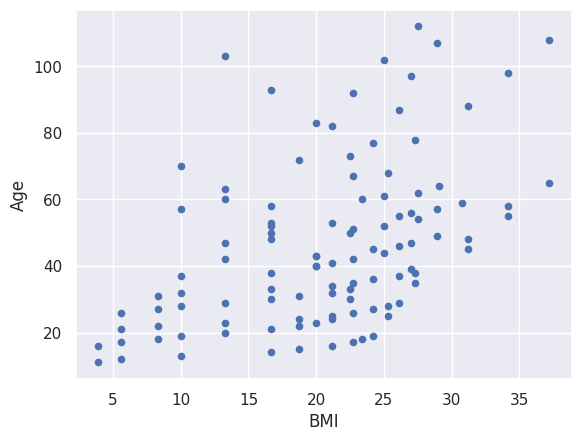

In [ ]:
obesity.plot(kind='scatter', x = 'BMI', y = 'Age')
plt.show()

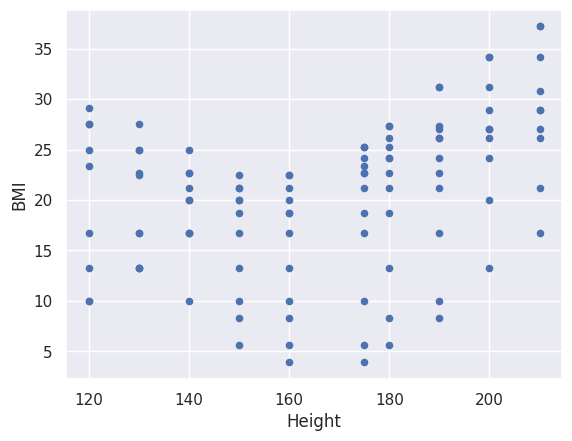

In [ ]:
#plot sepal length vs petal length
obesity.plot(kind='scatter', x = 'Height', y = 'BMI')
plt.show()

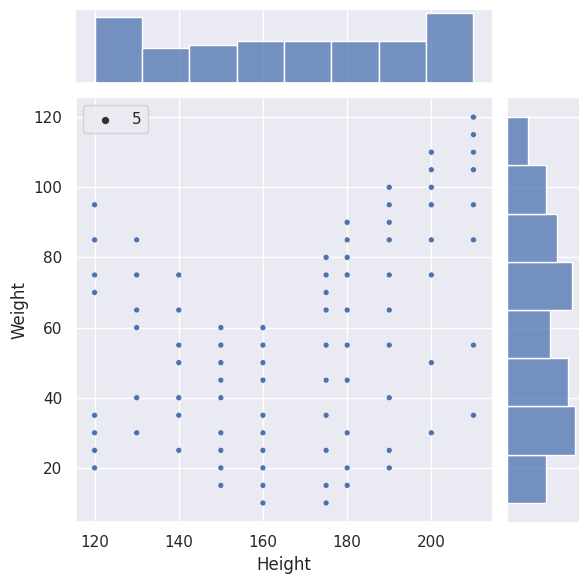

In [ ]:
##Let's use seaborn to creating a jointplot with bivariate scatterplots and histograms within the same figure.

sns.jointplot(x = 'Height', y = 'Weight', data = obesity, size =5)
plt.show()

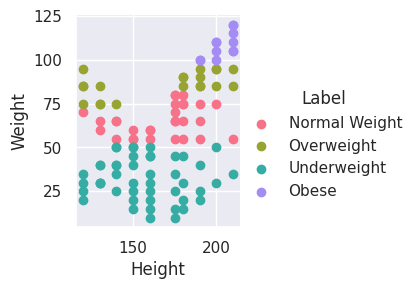

In [ ]:
#The previous scatterplots do not differentiate among the label.
# Let's use seaborn' FacetGrid to indicate which points belong to the various species.
# hue - represents the column which we wish to give each unique record a different color
# palette - represents the color scheme that is used.

sns.FacetGrid(obesity, hue='Label', palette='husl').map(plt.scatter, 'Height', 'Weight').add_legend()
plt.show()

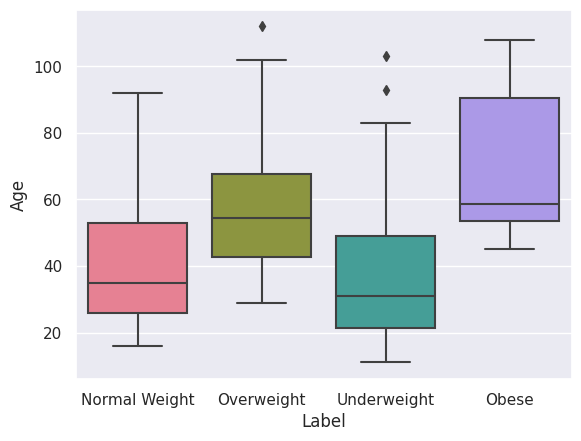

In [ ]:
#Experiment with different color palettes. Check out the seaborn documentation here: https://seaborn.pydata.org/tutorial/color_palettes.html
#Create Boxplot
sns.boxplot(x='Label', y='Age', palette='husl', data=obesity)
plt.show()

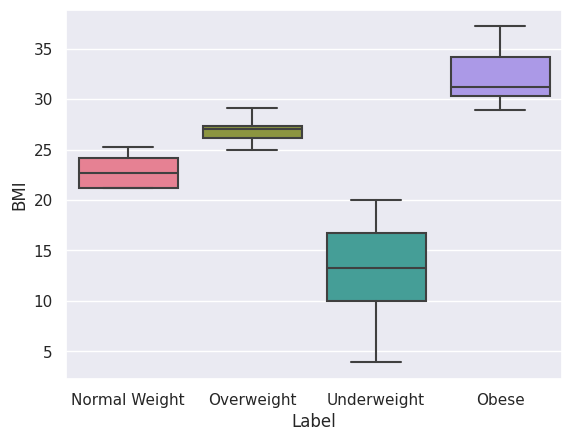

In [ ]:
sns.boxplot(x='Label', y ='BMI', palette='husl', data = obesity)
plt.show()

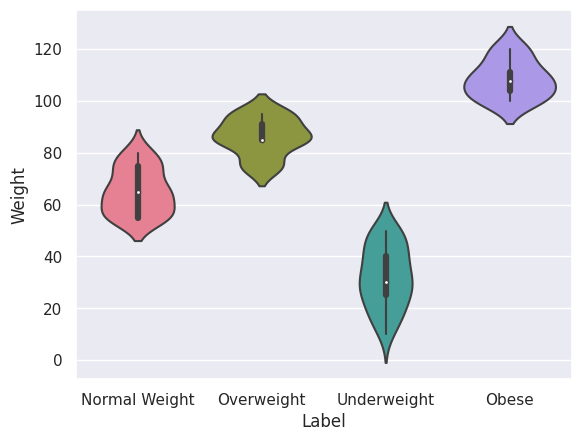

In [ ]:
#How about a violin plot?!
#Violin plots show the density of the data at various primary splits.
#The denser sections are thicker than the sparse ones.
sns.violinplot(x='Label', y='Weight', palette='husl', data=obesity)
plt.show()

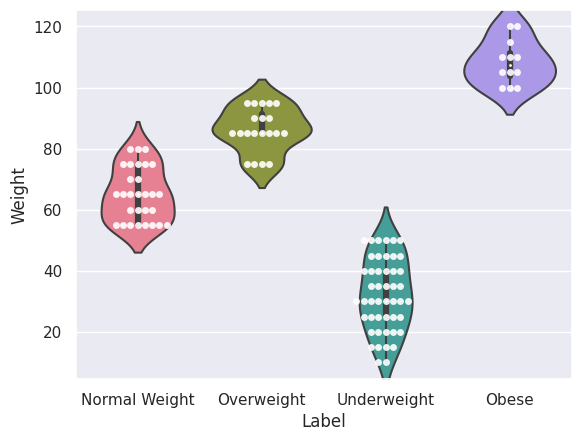

In [ ]:
#plotting a violin plot
#Violin plot with the datapoints overlayed on the figures. This gives us a better idea of the data distribution.
sns.violinplot(x= 'Label', y='Weight', palette='husl', data=obesity)

#plotting a swarm plot on top of the violin plot
sns.swarmplot(x='Label', y='Weight', data=obesity, color='w', alpha=.9);
plt.show()


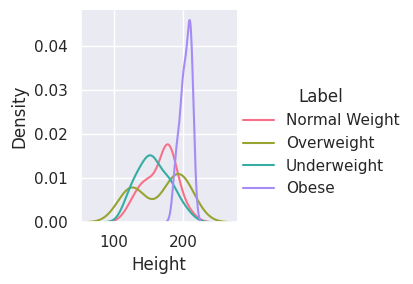

In [ ]:
#Kdeplot - great for looking at univariate relations.
#This visualizes the kernel density estimate of the underlying feature.
#The higher a line on the y-axis, the denser the data is at that x-axis number
sns.FacetGrid(obesity, hue='Label', palette='husl').map(sns.kdeplot, 'Height').add_legend()
plt.show()

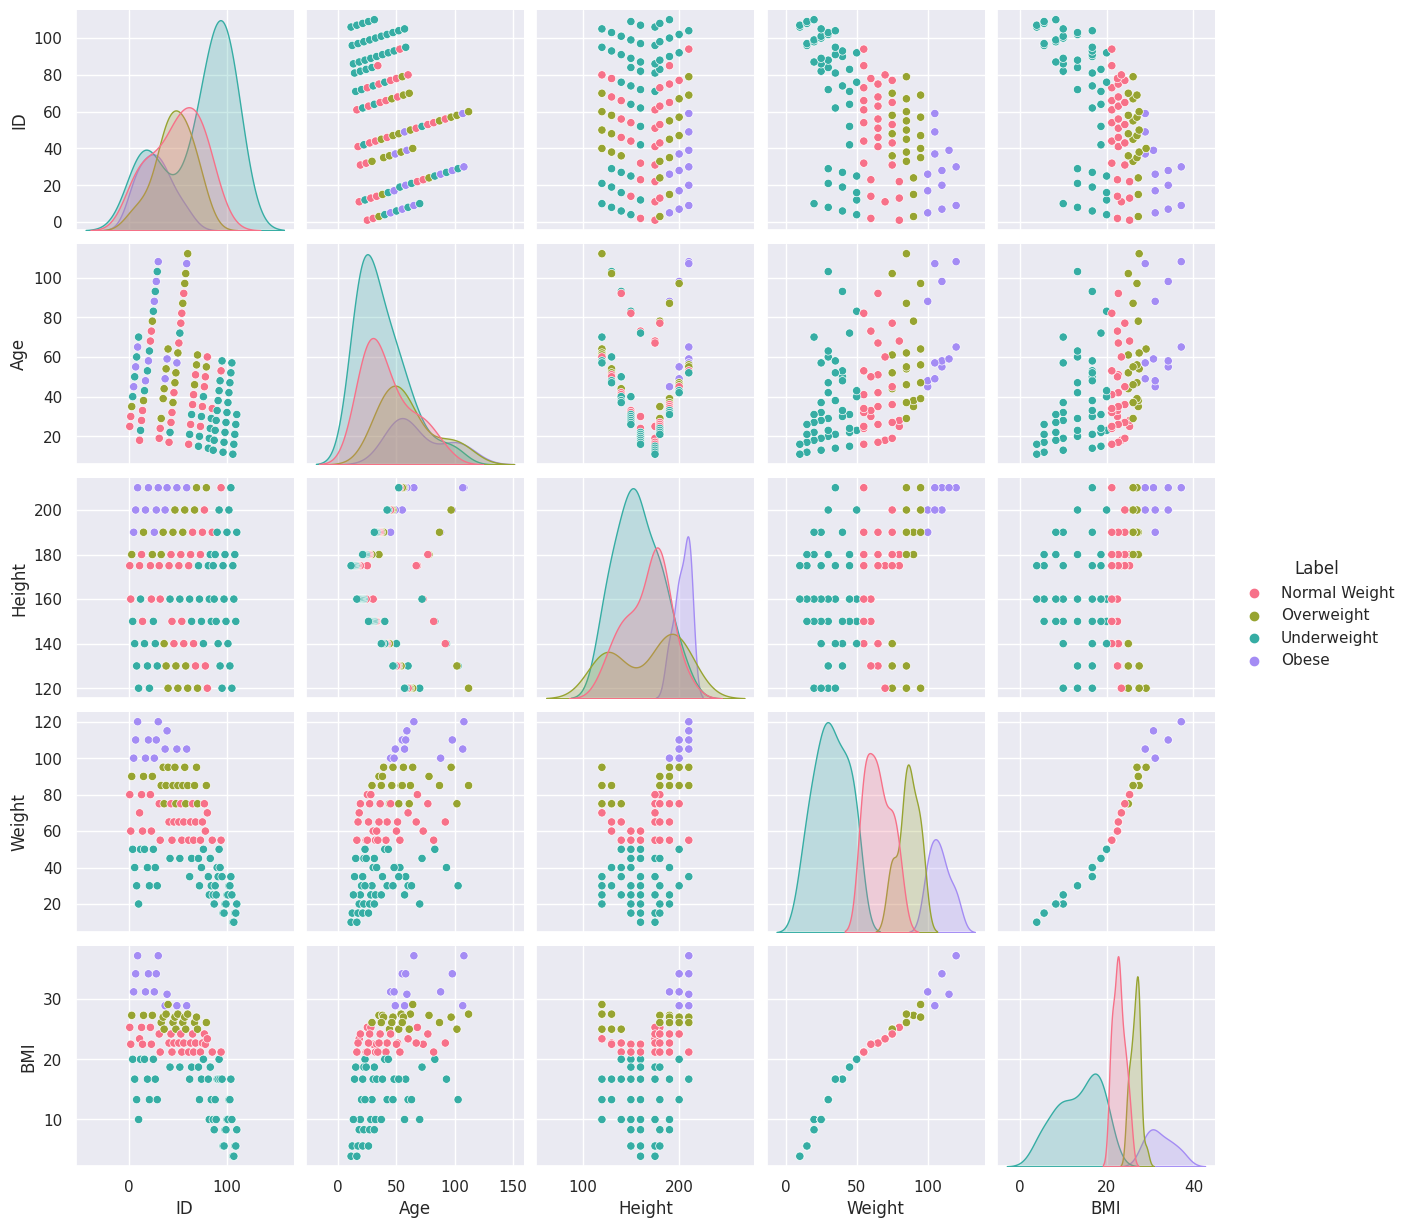

In [ ]:
#Pairplot - depicts the bivariate relation between each pair of features.
sns.pairplot(obesity, hue='Label', palette='husl')
plt.show()

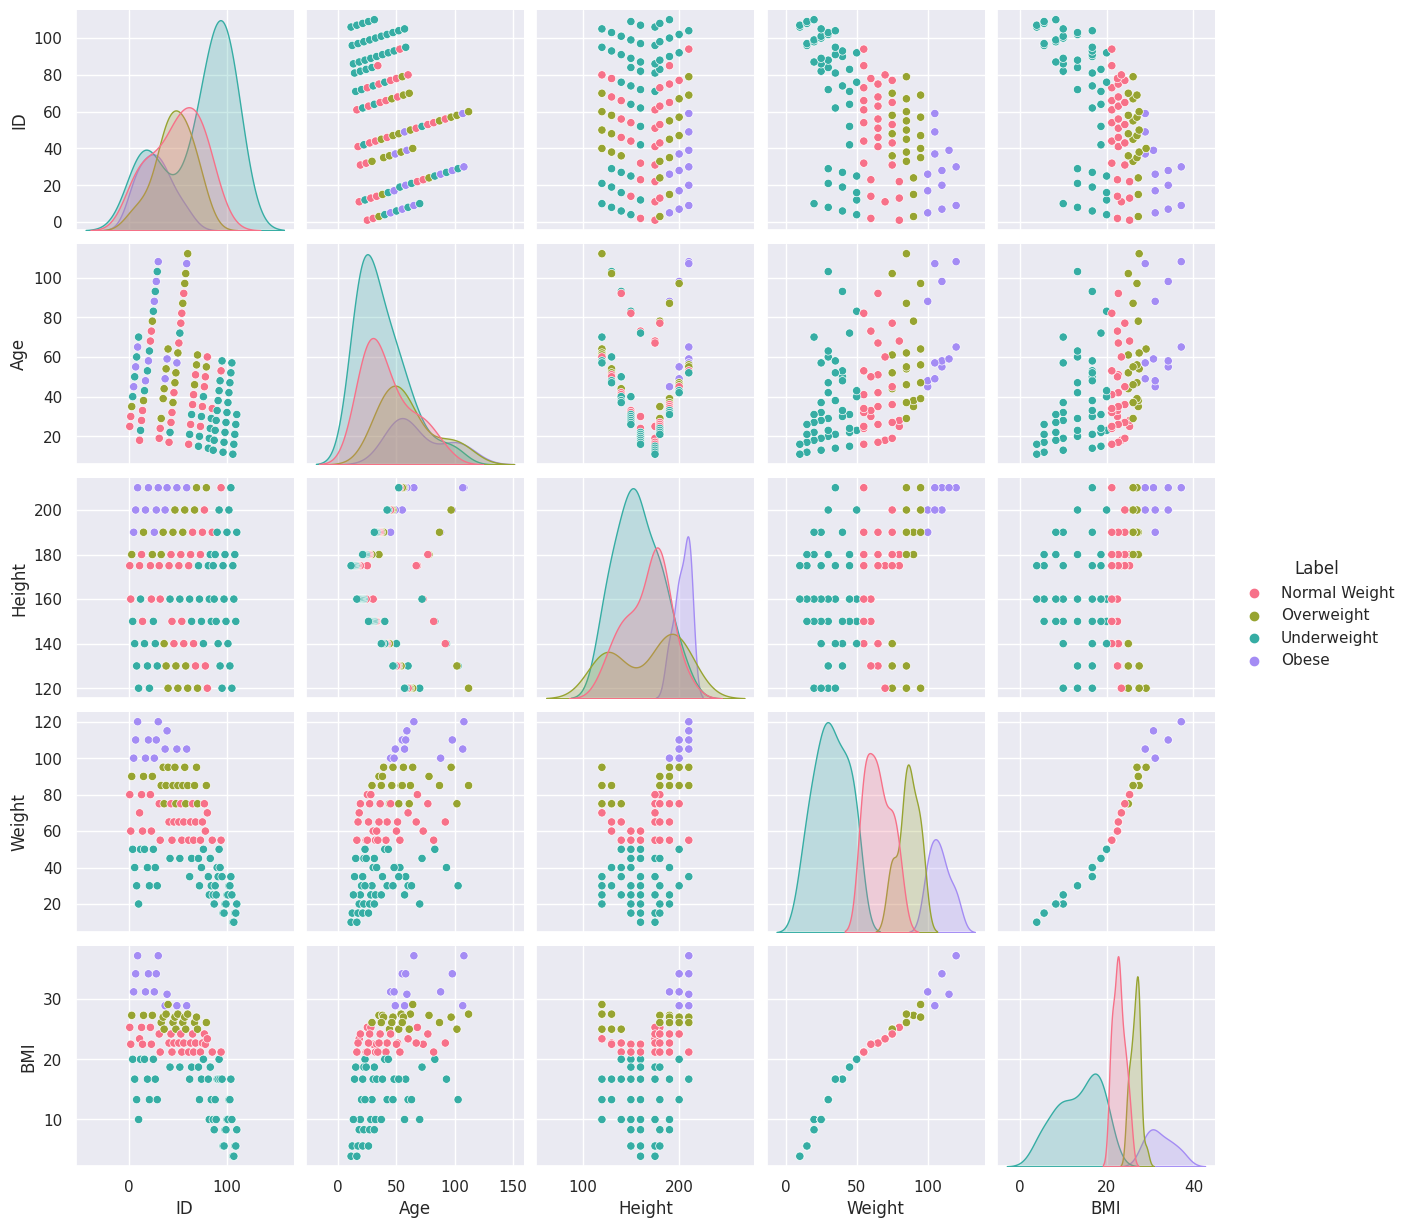

In [ ]:
#By default, a pairplot shows a similar figure by default along the diagonal. We can modify it to show other plots such as a kde.
sns.pairplot(obesity, hue='Label', palette='husl', diag_kind='kde')
plt.show()

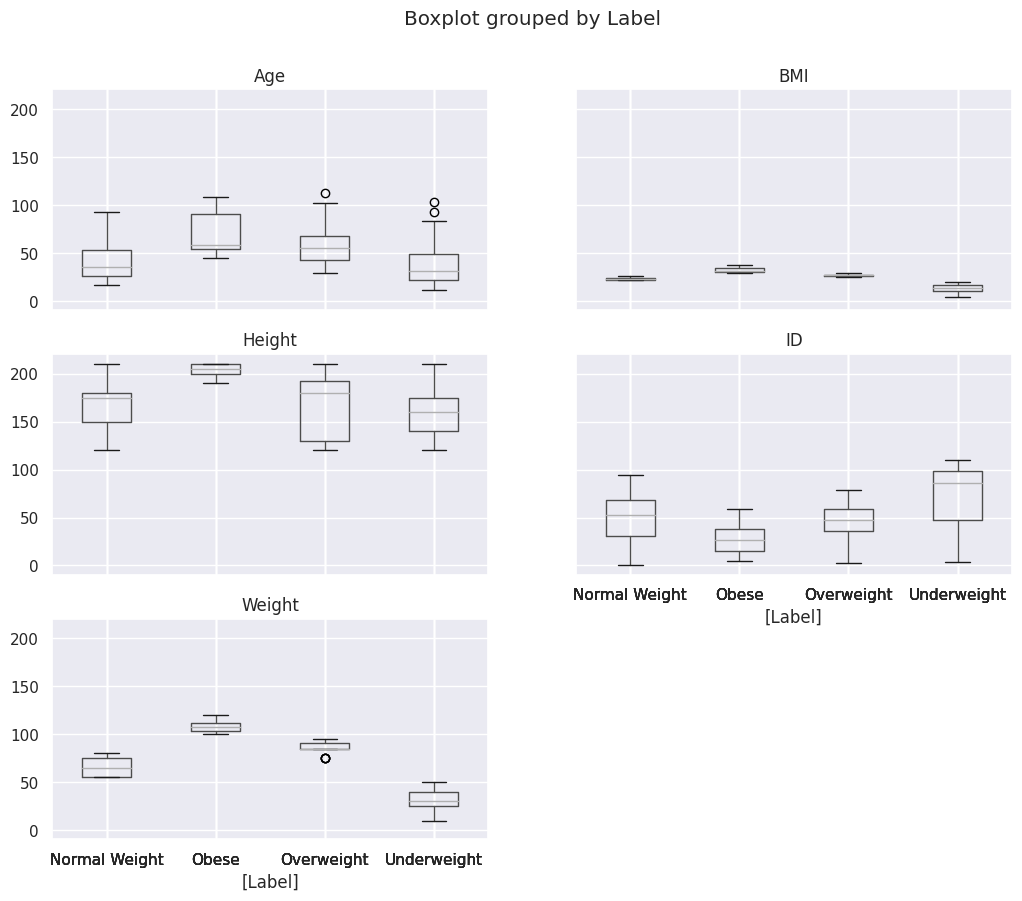

In [ ]:
#As seen earlier, = can create plots from with Pandas itself.
#boxplot - via pandas

obesity.boxplot(by='Label', figsize=(12, 10))
plt.show()

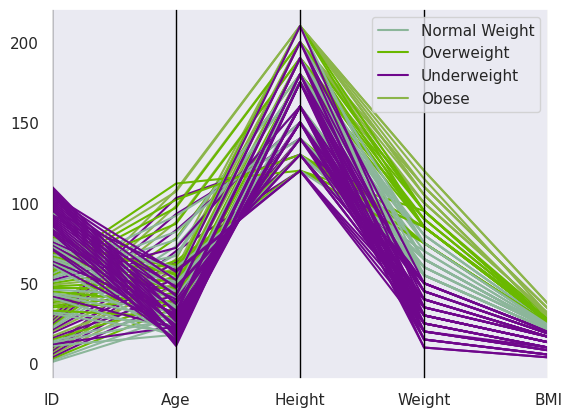

In [ ]:
#Parallel Coordinates allows us to see each feature in a separate column and the connecting features for each data sample
from pandas.plotting import parallel_coordinates
obesity.drop(columns=['Gender'], inplace=True)
parallel_coordinates(obesity, 'Label')
plt.show()